## Portfolio 2 - script 2 - logistic regression

*By Sofie Mosegaard, 07-03-2024*

In this script, a logistic regression classifier will be trained and evaluated.

### Import packages

In [ ]:
# System tools
import os
import sys
import scipy as sp

# Data munging tools
import pandas as pd

# Machine learning packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

# Save models
from joblib import dump, load

### Reading in the data

In [2]:
# Load the data to pandas csv
filepath = os.path.join(
                        "..",
                        "in",
                        "fake_or_real_news.csv"
                        )

data = pd.read_csv(filepath)

In [3]:
# Create the data variables
X = data["text"]
y = data["label"]

### Train-test split

Creating a 80:20 train:test split in the data using the input X (the text for the model) and y (the classification labels). To ensure reproducibility, a random state of 123 is included.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,    
                                                    test_size = 0.2,
                                                    random_state = 123)

### Import the vectorized features

As I have already created a vectorizer object and fitted that to my training and test data, I can simply import the objects:

In [5]:
X_train_features = sp.sparse.load_npz('../models/X_train_features_sparse_matrix.npz')
X_test_features = sp.sparse.load_npz('../models/X_test_features_sparse_matrix.npz')

### Classifying and predicting

Now, I need to fit my classifier to the data, where it will idenfity correlation between the features and labels. These correlations forms the "model", that the classifier learns. Subsequently, the model can predict labels for unseen data.

In [6]:
LR_classifier = LogisticRegression(random_state = 123).fit(X_train_features, y_train)

In [7]:
# Predicting labels for new, unseen data using the trained classifier
y_pred = LR_classifier.predict(X_test_features)

# Printing the predicted labels for the first 10 samples
print(y_pred[:10])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL']


### Evaluate

Lets assess the performance of the model! The models performances can be evaluated on a confusion matrix and metrics derived from one. The confusion matrix takes the classifier, the training features, and the training labels as inputs:

              precision    recall  f1-score   support

        FAKE       0.89      0.89      0.89       644
        REAL       0.89      0.88      0.88       623

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



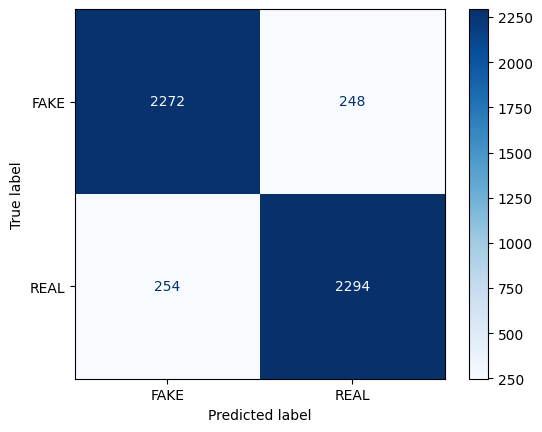

In [8]:
metrics.ConfusionMatrixDisplay.from_estimator(LR_classifier,
                                            X_train_features,
                                            y_train,
                                            cmap = plt.cm.Blues,
                                            labels = ["FAKE", "REAL"])

classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

### Save the classification report

In [9]:
filepath = "../out/LR_classification_report.txt"

with open(filepath, 'w') as file:
    file.write(classifier_metrics)

### Save the trained model

In [20]:
dump(LR_classifier, "../models/LR_classifier.joblib")

['../models/LogisticRegression_classifier.joblib']